#import all libreries 

In [113]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz as gv

#Load Data

In [114]:
dataset=pd.read_csv("titanic-passengers.csv", sep=";")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


#Preprocessing

In [115]:
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)

    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
  
    new_data = new_data.drop(columns = 'Name')
    new_data = new_data.drop(columns = 'PassengerId')
    return new_data
data=preprocess_data(dataset)

In [116]:
encoder=LabelEncoder()
dataset['Sex']=encoder.fit_transform(dataset['Sex'])
dataset['Age']=encoder.fit_transform(dataset['Age'])

In [117]:
x=data.drop(["Survived", "Cabin", "Ticket", "Embarked",'SibSp','Parch','Fare'], axis=1)
y= data["Survived"]

#Split the data 

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=17)

#Decision Tree

In [119]:
 
model=tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')
model.fit(x_train, y_train)   #fitting our model
y_pred=model.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8324022346368715


Try to improve the accuracy 

In [120]:
#Let's modify the max depth  and check its impat on the accuracy

max_depth = [2,3,4,5,6,7,8,9,10]
training_acc_val = []
testing_acc_val = []
for max_depth_val in max_depth:
  model = DecisionTreeClassifier(max_depth = max_depth_val)
  model.fit(x_train,y_train)
  y_predicted_val=model.predict(x_train)
  y_predicted = model.predict(x_test)
  acc_train = accuracy_score(y_train,y_predicted_val)
  acc_test = accuracy_score(y_test, y_predicted)
  testing_acc_val.append(acc_test)
  training_acc_val.append(acc_train)

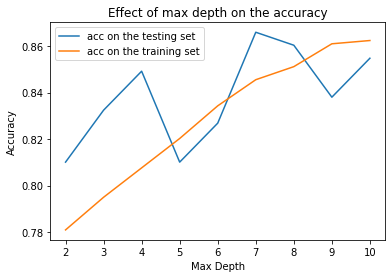

In [121]:
#Let's plot the accucary!
plt.plot(max_depth, testing_acc_val,label = 'acc on the testing set')
plt.plot(max_depth, training_acc_val,label = 'acc on the training set')
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of max depth on the accuracy")
plt.show()

From the graph, we notice that the best value of accuracy is 7

In [122]:
model=tree.DecisionTreeClassifier(max_depth=7,criterion='entropy')
model.fit(x_train, y_train)   #fitting our model
y_pred=model.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8659217877094972


#Decision Tree visualization

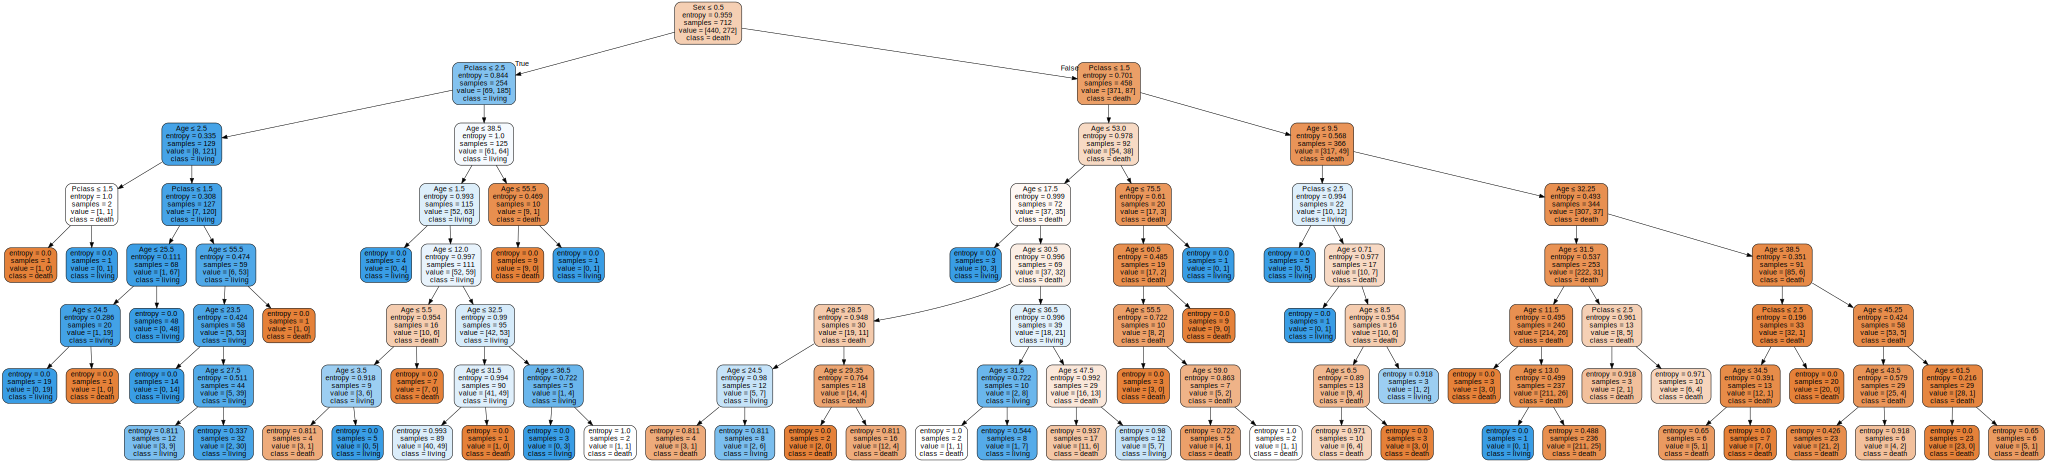

In [123]:
dot_data=tree.export_graphviz(model,out_file=None,feature_names=['Pclass','Sex','Age'],class_names=['death','living'],filled=True,rounded=True,special_characters=True)
graph=gv.Source(dot_data)
graph.render("data")
graph

we will take some examples to understand how our decision tree works:


* example1: a 30 years old woman who is in 1st class 

     interpretation: sex inferior to 0.5 (yes we go to the left),Pcalass inferior to 2.5 (yes we go to the left),Age inferior to 23.5 (no we go to the right) and the result is that this woman has survived according to our decision tree 
* example2: 6 year old male in 3rd class 

     interpretation:Sex inferior to 0.5 (no we pass to the right),Age inferior to 6.5 (yes we pass to the left),Pclass inferior to 2.5 (no we pass to the right) and the result is that this man is dead 



Now we try to change the coast  function entropy to gini and see the impact on the accuracy

In [124]:
model1=tree.DecisionTreeClassifier(max_depth=7,criterion='gini')
model1.fit(x_train, y_train)   #fitting our model
y_pred=model1.predict(x_test)   # evaluating our model,
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8659217877094972


we have the same  score when we use the gini criterion 

let's try to change the n_estimator criterion to see the impact on the accuracy

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model3=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 10 decision trees
model3.fit(x_train, y_train)  #Training our model
y_pred=model3.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8770949720670391


In [126]:
model4=RandomForestClassifier(n_estimators=100)  #Creating a random forest with 100 decision trees
model4.fit(x_train, y_train)  #Training our model
y_pred=model4.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8659217877094972


we obtained a better score when we increased the number of trees from 10 to 100